In [8]:
import os
import math
import time
import tarfile
import shutil
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy import constants as cons
from astropy.table import Table, Column, vstack, join
import astropy.coordinates as coords
from astropy import units as u
from scipy import stats
import matplotlib.mlab as mlab

mpl.rc("font", family="Complex", size=17)
mpl.rc("axes", linewidth =  1 )
mpl.rc("lines", linewidth = 1 )
mpl.rc("xtick.major", pad = 8, size = 8, width = 1)
mpl.rc("ytick.major", pad = 8, size = 8, width = 1)
mpl.rc("xtick.minor", size = 4, width = 1 )
mpl.rc("ytick.minor", size = 4, width = 1 )

In [6]:
#read the data 
hmscList = ascii.read('../Tables/hmscList_full_20161218.txt')
hiiList  = ascii.read('../Tables/hiiList_20161218.dat')
mmbList  = ascii.read('/Users/yuan/Desktop/MaserUTas/MMB/Tables/mmbGP_with_full_para_20161218.txt')
hiiList = hiiList[hiiList['Sp']>0.5]
mmbList = mmbList[mmbList['Sp_870']>0.5]
mmbList = mmbList[mmbList['L_M_ratio']<10000]
hiiList = hiiList[hiiList['L_M_ratio']<10000]
hmscList['L_M_ratio'].mask[hmscList['Mclump'].mask == True] = True

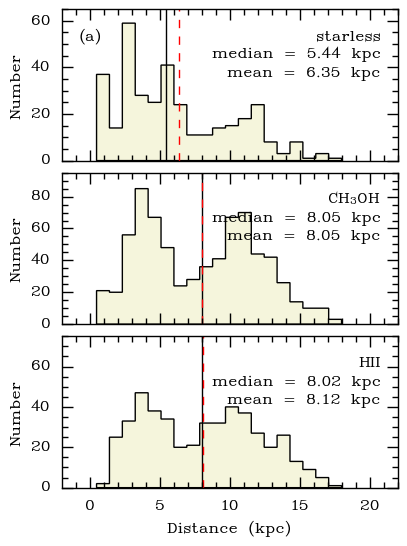

In [29]:
%matplotlib inline
# histograms of distances
xmin = -2
xmax = 22
ymin = 0 
ymax = 65
fig1 = plt.figure(1, figsize = (4,5.5))
fig1.subplots_adjust(left = 0.07, right = 0.91, hspace = 0.08,
                     bottom = 0.09, top = 0.96)

m1  = np.median(hmscList['Dist_B'][hmscList['Dist_B'].mask == False])
m2  = np.mean(hmscList['Dist_B'][hmscList['Dist_B'].mask == False])
ax1 = fig1.add_subplot(311)
ax1.hist(hmscList['Dist_B'], bins = np.linspace(0.5,18,20), 
         histtype = 'stepfilled', color = 'beige')
ax1.plot([m1,m1],[0,65], '-k')
ax1.plot([m2,m2],[0,65], '--r')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([0,65])
ax1.minorticks_on()
ax1.set_xticklabels([])
ax1.set_yticks([0,20,40,60])
ax1.text(xmin+(xmax-xmin)*0.05, 
         ymax-(ymax-ymin)*0.2, '(a)')
ax1.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.2, 
         'starless', horizontalalignment = 'right')
ax1.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1+' kpc', horizontalalignment = 'right')
ax1.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2+' kpc', horizontalalignment = 'right')
ax1.set_ylabel('Number')

ymin = 0 
ymax = 95
m1  = np.median(mmbList['Dist_B'][mmbList['Dist_B'].mask == False])
m2  = np.mean(mmbList['Dist_B'][mmbList['Dist_B'].mask == False])
ax2 = fig1.add_subplot(312)
ax2.hist(mmbList['Dist_B'],  bins = np.linspace(0.5,18,20),
         histtype = 'stepfilled', color = 'beige')
ax2.plot([m1,m1],[0,95], '-k')
ax2.plot([m2,m2],[0,95], '--r')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([0,95])
ax2.minorticks_on()
ax2.set_xticklabels([])
#ax2.text(xmin+(xmax-xmin)*0.05, 
#         ymax-(ymax-ymin)*0.2, '(b)')
ax2.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.2, 
         'CH$_3$OH', horizontalalignment = 'right')
ax2.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1+' kpc', horizontalalignment = 'right')
ax2.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2+' kpc', horizontalalignment = 'right')
ax2.set_ylabel('Number')

ymin = 0 
ymax = 75
m1  = np.median(hiiList['Dist_B'])
m2  = np.mean(hiiList['Dist_B'])
ax3 = fig1.add_subplot(313)
ax3.hist(hiiList['Dist_B'], bins = np.linspace(0.5,18,20), 
         histtype = 'stepfilled', color = 'beige')
ax3.plot([m1,m1],[0,75], '-k')
ax3.plot([m2,m2],[0,75], '--r')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([0,75])
ax3.set_yticks([0,20,40,60])
ax3.minorticks_on()

#ax3.text(xmin+(xmax-xmin)*0.05, 
#         ymax-(ymax-ymin)*0.2, '(c)')
ax3.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.2, 
         'HII', horizontalalignment = 'right')
ax3.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1+' kpc', horizontalalignment = 'right')
ax3.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2+' kpc', horizontalalignment = 'right')

ax3.set_xlabel(r"Distance (kpc)")
ax3.set_ylabel('Number')

fig1.savefig('../epsFigs/distanceHist.eps' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
fig1.savefig('../epsFigs/distanceHist.pdf' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')

10.434654478900001

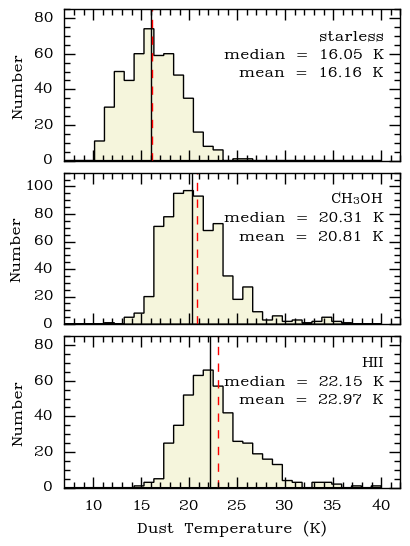

In [30]:
# histograms of distances
xmin = 7
xmax = 42
ymin = 0 
ymax = 85
fig2 = plt.figure(2, figsize = (4,5.5))
fig2.subplots_adjust(left = 0.07, right = 0.91, hspace = 0.08,
                     bottom = 0.09, top = 0.96)

m1  = np.median(hmscList['Tdust'][hmscList['Tdust'].mask == False])
m2  = np.mean(hmscList['Tdust'][hmscList['Tdust'].mask == False])
ax1 = fig2.add_subplot(311)
ax1.hist(hmscList['Tdust'], bins = np.linspace(5,40,35), 
         histtype = 'stepfilled', color = 'beige')
ax1.plot([m1,m1],[ymin,ymax], '-k')
ax1.plot([m2,m2],[ymin,ymax], '--r')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([ymin,ymax])
ax1.minorticks_on()
ax1.set_xticklabels([])
ax1.set_yticks([0,20,40,60,80])
#ax1.text(xmin+(xmax-xmin)*0.05, 
#         ymax-(ymax-ymin)*0.2, '(a)')
ax1.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.2, 
         'starless', horizontalalignment = 'right')
ax1.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1+' K', horizontalalignment = 'right')
ax1.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2+' K', horizontalalignment = 'right')
ax1.set_ylabel('Number')

ymin = 0 
ymax = 110
m1  = np.median(mmbList['Tdust'][mmbList['Tdust'].mask == False])
m2  = np.mean(mmbList['Tdust'][mmbList['Tdust'].mask == False])
ax2 = fig2.add_subplot(312)
ax2.hist(mmbList['Tdust'],  bins = np.linspace(5,40,35),
         histtype = 'stepfilled', color = 'beige')
ax2.plot([m1,m1],[ymin,ymax], '-k')
ax2.plot([m2,m2],[ymin,ymax], '--r')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([ymin,ymax])
ax2.minorticks_on()
ax2.set_xticklabels([])
#ax2.text(xmin+(xmax-xmin)*0.05, 
#         ymax-(ymax-ymin)*0.2, '(b)')
ax2.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.2, 
         'CH$_3$OH', horizontalalignment = 'right')
ax2.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1+' K', horizontalalignment = 'right')
ax2.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2+' K', horizontalalignment = 'right')
ax2.set_ylabel('Number', labelpad = 0)

ymin = 0 
ymax = 85
m1  = np.median(hiiList['Tdust'])
m2  = np.mean(hiiList['Tdust'])
ax3 = fig2.add_subplot(313)
ax3.hist(hiiList['Tdust'], np.linspace(5,40,35), 
         histtype = 'stepfilled', color = 'beige')
ax3.plot([m1,m1],[ymin,ymax], '-k')
ax3.plot([m2,m2],[ymin,ymax], '--r')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([ymin,ymax])
ax3.set_yticks([0,20,40,60,80])
ax3.minorticks_on()

#ax3.text(xmin+(xmax-xmin)*0.05, 
#         ymax-(ymax-ymin)*0.2, '(c)')
ax3.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.2, 
         'HII', horizontalalignment = 'right')
ax3.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1+' K', horizontalalignment = 'right')
ax3.text(xmax-(xmax-xmin)*0.05, ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2+' K', horizontalalignment = 'right')

ax3.set_xlabel(r"Dust Temperature (K)")
ax3.set_ylabel('Number')

fig2.savefig('../epsFigs/TdustHist.eps' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
fig2.savefig('../epsFigs/TdustHist.pdf' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
np.min(hmscList['Tdust'][hmscList['Tdust'].mask == False])

523.30918524599997

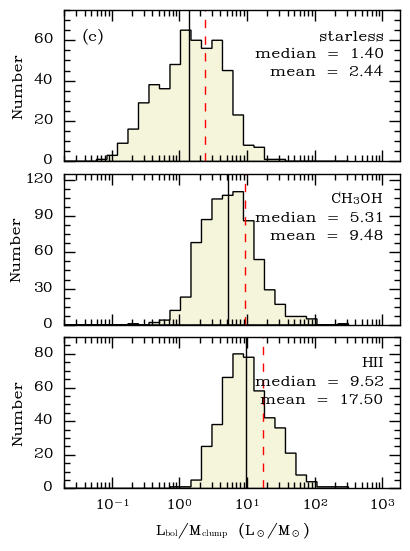

In [31]:
%matplotlib inline
# histograms of distances
xmin = 0.02
xmax = 1850
ymin = 0 
ymax = 75
fig3 = plt.figure(2, figsize = (4,5.5))
fig3.subplots_adjust(left = 0.07, right = 0.91, hspace = 0.08,
                     bottom = 0.09, top = 0.96)

m1  = np.median(hmscList['L_M_ratio'][hmscList['L_M_ratio'].mask == False])
m2  = np.mean(hmscList['L_M_ratio'][hmscList['L_M_ratio'].mask == False])
ax1 = fig3.add_subplot(311)
ax1.hist(hmscList['L_M_ratio'], bins = np.logspace(-2,2.5,30), 
         histtype = 'stepfilled', color = 'beige')
ax1.set_xscale('log')
ax1.plot([m1,m1],[ymin,ymax], '-k')
ax1.plot([m2,m2],[ymin,ymax], '--r')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([ymin,ymax])
ax1.minorticks_on()
ax1.set_xticklabels([])
ax1.set_yticks([0,20,40,60])
ax1.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
         ymax-(ymax-ymin)*0.2, '(c)')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'starless', horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax1.set_ylabel('Number')

ymin = 0 
ymax = 125
m1  = np.median(mmbList['L_M_ratio'][mmbList['L_M_ratio'].mask == False])
m2  = np.mean(mmbList['L_M_ratio'][mmbList['L_M_ratio'].mask == False])
ax2 = fig3.add_subplot(312)
ax2.hist(mmbList['L_M_ratio'],  bins = np.logspace(-2,2.5,30),
         histtype = 'stepfilled', color = 'beige')
ax2.set_xscale('log')
ax2.plot([m1,m1],[ymin,ymax], '-k')
ax2.plot([m2,m2],[ymin,ymax], '--r')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([ymin,ymax])
ax2.minorticks_on()
ax2.set_xticklabels([])
ax2.set_yticks([0,30,60,90,120])
#ax2.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(b)')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'CH$_3$OH', horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax2.set_ylabel('Number', labelpad = 0)

ymin = 0 
ymax = 90
m1  = np.median(hiiList['L_M_ratio'])
m2  = np.mean(hiiList['L_M_ratio'])
ax3 = fig3.add_subplot(313)
ax3.hist(hiiList['L_M_ratio'], bins = np.logspace(-2,2.5,30), 
         histtype = 'stepfilled', color = 'beige')
ax3.set_xscale('log')
ax3.plot([m1,m1],[ymin,ymax], '-k')
ax3.plot([m2,m2],[ymin,ymax], '--r')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([ymin,ymax])
ax3.set_yticks([0,20,40,60,80])
ax3.minorticks_on()

#ax3.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(c)')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'HII', horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')

ax3.set_xlabel(r"$L_\mathrm{bol}/M_\mathrm{clump}$ ($L_\odot/M_\odot$)")
ax3.set_ylabel('Number')

fig3.savefig('../epsFigs/L_M_ratioHist.eps' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
fig3.savefig('../epsFigs/L_M_ratioHist.pdf' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
np.max(hmscList['L_M_ratio'][hmscList['L_M_ratio'].mask == False])
np.max(hiiList['L_M_ratio'])

4.54379568783e+21
7.05900120867e+21
1.57595455936e+21


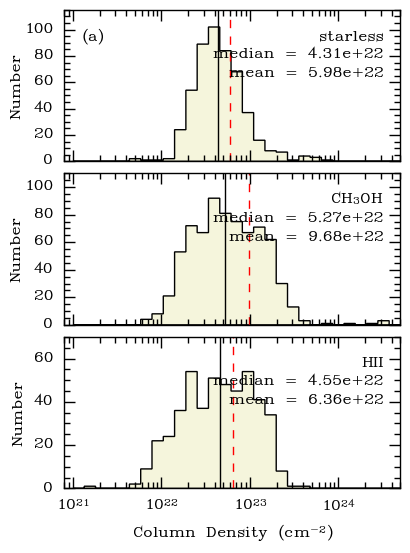

In [32]:

xmin = 8e20
xmax = 5e24
ymin = 0 
ymax = 115
fig4 = plt.figure(2, figsize = (4,5.5))
fig4.subplots_adjust(left = 0.07, right = 0.91, hspace = 0.08,
                     bottom = 0.09, top = 0.96)

m1  = np.median(hmscList['Nh2'][hmscList['Nh2'].mask == False])
m2  = np.mean(hmscList['Nh2'][hmscList['Nh2'].mask == False])
ax1 = fig4.add_subplot(311)
ax1.hist(hmscList['Nh2'], bins = np.logspace(21,24.7,30), 
         histtype = 'stepfilled', color = 'beige')
ax1.set_xscale('log')
ax1.plot([m1,m1],[ymin,ymax], '-k')
ax1.plot([m2,m2],[ymin,ymax], '--r')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([ymin,ymax])
ax1.minorticks_on()
ax1.set_xticklabels([])
ax1.set_yticks([0,20,40,60,80,100])
ax1.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
         ymax-(ymax-ymin)*0.2, '(a)')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'starless', horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2e' %m1, horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2e' %m2, horizontalalignment = 'right')
ax1.set_ylabel('Number', labelpad = 0)

ymin = 0 
ymax = 110
m1  = np.median(mmbList['Nh2'][mmbList['Nh2'].mask == False])
m2  = np.mean(mmbList['Nh2'][mmbList['Nh2'].mask == False])
ax2 = fig4.add_subplot(312)
ax2.hist(mmbList['Nh2'],  bins = np.logspace(21,24.7,30),
         histtype = 'stepfilled', color = 'beige')
ax2.set_xscale('log')
ax2.plot([m1,m1],[ymin,ymax], '-k')
ax2.plot([m2,m2],[ymin,ymax], '--r')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([ymin,ymax])
ax2.minorticks_on()
ax2.set_xticklabels([])
#ax2.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(b)')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'CH$_3$OH', horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2e' %m1, horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2e' %m2, horizontalalignment = 'right')
ax2.set_ylabel('Number', labelpad = 0)

ymin = 0 
ymax = 70
m1  = np.median(hiiList['Nh2'])
m2  = np.mean(hiiList['Nh2'])
ax3 = fig4.add_subplot(313)
ax3.hist(hiiList['Nh2'], bins = np.logspace(21,24.7,30), 
         histtype = 'stepfilled', color = 'beige')
ax3.set_xscale('log')
ax3.plot([m1,m1],[ymin,ymax], '-k')
ax3.plot([m2,m2],[ymin,ymax], '--r')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([ymin,ymax])
ax3.set_yticks([0,20,40,60])
ax3.minorticks_on()

#ax3.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(c)')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'HII', horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2e' %m1, horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2e' %m2, horizontalalignment = 'right')

ax3.set_xlabel(r"Column Density (cm$^{-2}$)")
ax3.set_ylabel('Number')

fig4.savefig('../epsFigs/Nh2Hist.eps' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
fig4.savefig('../epsFigs/Nh2Hist.pdf' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
print(np.min(hmscList['Nh2'][hmscList['Nh2'].mask == False]))
print(np.min(mmbList['Nh2'][mmbList['Nh2'].mask == False]))
print(np.min(hiiList['Nh2']))

2364218.86953
2372443.86741
519538.293713


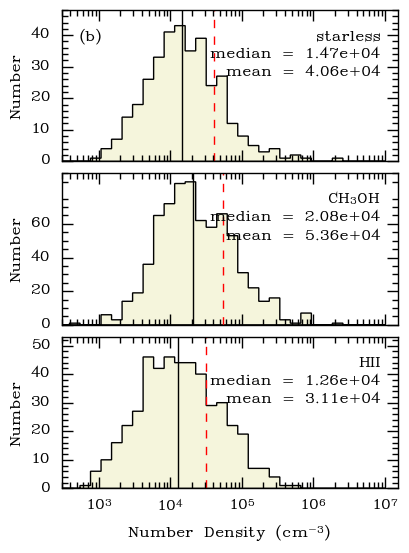

In [50]:

xmin = 3e2
xmax = 1.5e7
ymin = 0 
ymax = 48
fig5 = plt.figure(2, figsize = (4,5.5))
fig5.subplots_adjust(left = 0.07, right = 0.91, hspace = 0.08,
                     bottom = 0.09, top = 0.96)

m1  = np.median(hmscList['n_H2'][hmscList['n_H2'].mask == False])
m2  = np.mean(hmscList['n_H2'][hmscList['n_H2'].mask == False])
ax1 = fig5.add_subplot(311)
ax1.hist(hmscList['n_H2'], bins = np.logspace(2,7,35), 
         histtype = 'stepfilled', color = 'beige')
ax1.set_xscale('log')
ax1.plot([m1,m1],[ymin,ymax], '-k')
ax1.plot([m2,m2],[ymin,ymax], '--r')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([ymin,ymax])
ax1.minorticks_on()
ax1.set_xticklabels([])
ax1.set_yticks([0,10,20,30,40])
ax1.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
         ymax-(ymax-ymin)*0.2, '(b)')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'starless', horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2e' %m1, horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2e' %m2, horizontalalignment = 'right')
ax1.set_ylabel('Number')

ymin = 0 
ymax = 95
m1  = np.median(mmbList['n_H2'][mmbList['n_H2'].mask == False])
m2  = np.mean(mmbList['n_H2'][mmbList['n_H2'].mask == False])
ax2 = fig5.add_subplot(312)
ax2.hist(mmbList['n_H2'],  bins = np.logspace(2,7,35),
         histtype = 'stepfilled', color = 'beige')
ax2.set_xscale('log')
ax2.plot([m1,m1],[ymin,ymax], '-k')
ax2.plot([m2,m2],[ymin,ymax], '--r')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([ymin,ymax])
ax2.minorticks_on()
ax2.set_xticklabels([])
ax2.set_yticks([0,20,40,60,80])
#ax2.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(b)')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'CH$_3$OH', horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2e' %m1, horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2e' %m2, horizontalalignment = 'right')
ax2.set_ylabel('Number')

ymin = 0 
ymax = 53
m1  = np.median(hiiList['n_H2'])
m2  = np.mean(hiiList['n_H2'])
ax3 = fig5.add_subplot(313)
ax3.hist(hiiList['n_H2'], bins = np.logspace(2,7,35), 
         histtype = 'stepfilled', color = 'beige')
ax3.set_xscale('log')
ax3.plot([m1,m1],[ymin,ymax], '-k')
ax3.plot([m2,m2],[ymin,ymax], '--r')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([ymin,ymax])
#ax3.set_yticks([0,20,40,60])
ax3.minorticks_on()

#ax3.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(c)')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'HII', horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2e' %m1, horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2e' %m2, horizontalalignment = 'right')

ax3.set_xlabel(r"Number Density (cm$^{-3}$)")
ax3.set_ylabel('Number')

fig5.savefig('../epsFigs/n_H2Hist.eps' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
fig5.savefig('../epsFigs/n_H2Hist.pdf' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
print(np.max(hmscList['n_H2'][hmscList['n_H2'].mask == False]))
print(np.max(mmbList['n_H2'][mmbList['n_H2'].mask == False]))
print(np.max(hiiList['n_H2']))

0.0469052162814
0.0690674220878
0.0694751801614


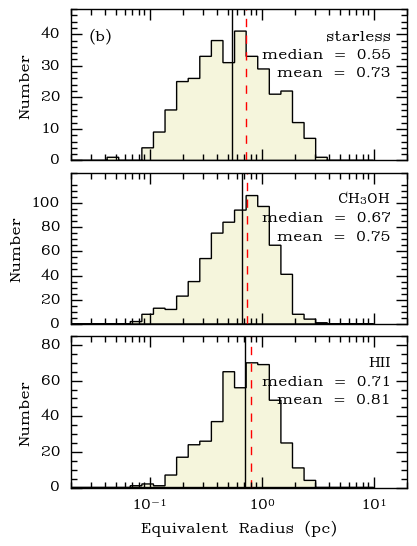

In [52]:

xmin = 2e-2
xmax = 20
ymin = 0 
ymax = 48
fig6 = plt.figure(2, figsize = (4,5.5))
fig6.subplots_adjust(left = 0.07, right = 0.91, hspace = 0.08,
                     bottom = 0.09, top = 0.96)

m1  = np.median(hmscList['r_pc'][hmscList['r_pc'].mask == False])
m2  = np.mean(hmscList['r_pc'][hmscList['r_pc'].mask == False])
ax1 = fig6.add_subplot(311)
ax1.hist(hmscList['r_pc'], bins = np.logspace(-2,1,30), 
         histtype = 'stepfilled', color = 'beige')
ax1.set_xscale('log')
ax1.plot([m1,m1],[ymin,ymax], '-k')
ax1.plot([m2,m2],[ymin,ymax], '--r')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([ymin,ymax])
ax1.minorticks_on()
ax1.set_xticklabels([])
ax1.set_yticks([0,10,20,30,40])
ax1.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
         ymax-(ymax-ymin)*0.2, '(b)')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'starless', horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax1.set_ylabel('Number')

ymin = 0 
ymax = 125
m1  = np.median(mmbList['r_pc'][mmbList['r_pc'].mask == False])
m2  = np.mean(mmbList['r_pc'][mmbList['r_pc'].mask == False])
ax2 = fig6.add_subplot(312)
ax2.hist(mmbList['r_pc'],  bins = np.logspace(-2,1,30),
         histtype = 'stepfilled', color = 'beige')
ax2.set_xscale('log')
ax2.plot([m1,m1],[ymin,ymax], '-k')
ax2.plot([m2,m2],[ymin,ymax], '--r')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([ymin,ymax])
ax2.minorticks_on()
ax2.set_xticklabels([])
ax2.set_yticks([0,30,60,90,100])
#ax2.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(b)')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'CH$_3$OH', horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax2.set_ylabel('Number')

ymin = 0 
ymax = 85
m1  = np.median(hiiList['r_pc'])
m2  = np.mean(hiiList['r_pc'])
ax3 = fig6.add_subplot(313)
ax3.hist(hiiList['r_pc'], bins = np.logspace(-2,1,30), 
         histtype = 'stepfilled', color = 'beige')
ax3.set_xscale('log')
ax3.plot([m1,m1],[ymin,ymax], '-k')
ax3.plot([m2,m2],[ymin,ymax], '--r')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([ymin,ymax])
ax3.set_yticks([0,20,40,60,80])
ax3.minorticks_on()

#ax3.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(c)')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'HII', horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')

ax3.set_xlabel(r"Equivalent Radius (pc)")
ax3.set_ylabel('Number')

fig6.savefig('../epsFigs/r_pcHist.eps' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
fig6.savefig('../epsFigs/r_pcHist.pdf' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
print(np.min(hmscList['r_pc'][hmscList['r_pc'].mask == False]))
print(np.min(mmbList['r_pc'][mmbList['r_pc'].mask == False]))
print(np.min(hiiList['r_pc']))

16.4578097145
6.33883347927
5.76578927261


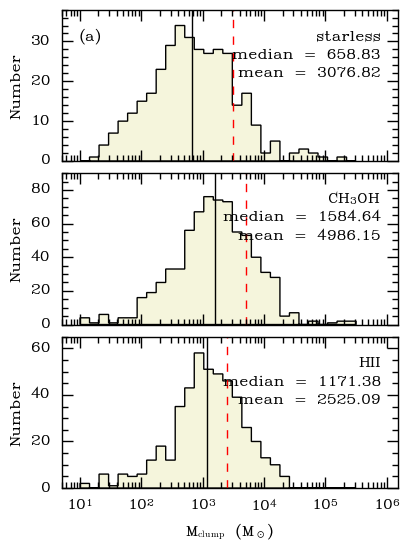

In [47]:

xmin = 5
xmax = 1.5e6
ymin = 0 
ymax = 38
fig7 = plt.figure(2, figsize = (4,5.5))
fig7.subplots_adjust(left = 0.07, right = 0.91, hspace = 0.08,
                     bottom = 0.09, top = 0.96)

m1  = np.median(hmscList['Mclump'][hmscList['Mclump'].mask == False])
m2  = np.mean(hmscList['Mclump'][hmscList['Mclump'].mask == False])
ax1 = fig7.add_subplot(311)
ax1.hist(hmscList['Mclump'], bins = np.logspace(1,5.5,30), 
         histtype = 'stepfilled', color = 'beige')
ax1.set_xscale('log')
ax1.plot([m1,m1],[ymin,ymax], '-k')
ax1.plot([m2,m2],[ymin,ymax], '--r')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([ymin,ymax])
ax1.minorticks_on()
ax1.set_xticklabels([])
ax1.set_yticks([0,10,20,30])
ax1.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
         ymax-(ymax-ymin)*0.2, '(a)')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'starless', horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax1.set_ylabel('Number')

ymin = 0 
ymax = 90
m1  = np.median(mmbList['Mclump'][mmbList['Mclump'].mask == False])
m2  = np.mean(mmbList['Mclump'][mmbList['Mclump'].mask == False])
ax2 = fig7.add_subplot(312)
ax2.hist(mmbList['Mclump'],  bins = np.logspace(1,5.5,30),
         histtype = 'stepfilled', color = 'beige')
ax2.set_xscale('log')
ax2.plot([m1,m1],[ymin,ymax], '-k')
ax2.plot([m2,m2],[ymin,ymax], '--r')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([ymin,ymax])
ax2.minorticks_on()
ax2.set_xticklabels([])
ax2.set_yticks([0,20,40,60,80])
#ax2.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(b)')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'CH$_3$OH', horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax2.set_ylabel('Number')

ymin = 0 
ymax = 65
m1  = np.median(hiiList['Mclump'])
m2  = np.mean(hiiList['Mclump'])
ax3 = fig7.add_subplot(313)
ax3.hist(hiiList['Mclump'], bins = np.logspace(1,5.5,30), 
         histtype = 'stepfilled', color = 'beige')
ax3.set_xscale('log')
ax3.plot([m1,m1],[ymin,ymax], '-k')
ax3.plot([m2,m2],[ymin,ymax], '--r')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([ymin,ymax])
ax3.set_yticks([0,20,40,60])
ax3.minorticks_on()

#ax3.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(c)')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'HII', horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')

ax3.set_xlabel(r"$M_\mathrm{clump}$ ($M_\odot$)")
ax3.set_ylabel('Number')

fig7.savefig('../epsFigs/MclumpHist.eps' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
fig7.savefig('../epsFigs/MclumpHist.pdf' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
print(np.min(hmscList['Mclump'][hmscList['Mclump'].mask == False]))
print(np.min(mmbList['Mclump'][mmbList['Mclump'].mask == False]))
print(np.min(hiiList['Mclump']))

13.9917271917
35.2588533671
73.4465965471


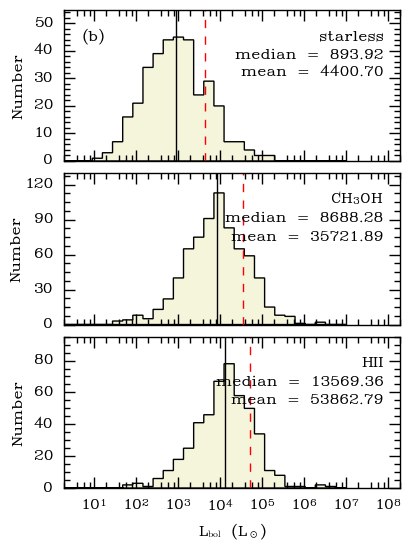

In [44]:

xmin = 2
xmax = 2e8
ymin = 0 
ymax = 55
fig8 = plt.figure(2, figsize = (4,5.5))
fig8.subplots_adjust(left = 0.07, right = 0.91, hspace = 0.08,
                     bottom = 0.09, top = 0.96)

m1  = np.median(hmscList['Lclump'][hmscList['Lclump'].mask == False])
m2  = np.mean(hmscList['Lclump'][hmscList['Lclump'].mask == False])
ax1 = fig8.add_subplot(311)
ax1.hist(hmscList['Lclump'], bins = np.logspace(0,7,30), 
         histtype = 'stepfilled', color = 'beige')
ax1.set_xscale('log')
ax1.plot([m1,m1],[ymin,ymax], '-k')
ax1.plot([m2,m2],[ymin,ymax], '--r')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([ymin,ymax])
ax1.minorticks_on()
ax1.set_xticklabels([])
ax1.set_yticks([0,10,20,30,40,50])
ax1.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
         ymax-(ymax-ymin)*0.2, '(b)')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'starless', horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax1.set_ylabel('Number')

ymin = 0 
ymax = 130
m1  = np.median(mmbList['Lclump'][mmbList['Lclump'].mask == False])
m2  = np.mean(mmbList['Lclump'][mmbList['Lclump'].mask == False])
ax2 = fig8.add_subplot(312)
ax2.hist(mmbList['Lclump'],  bins = np.logspace(0,7,30),
         histtype = 'stepfilled', color = 'beige')
ax2.set_xscale('log')
ax2.plot([m1,m1],[ymin,ymax], '-k')
ax2.plot([m2,m2],[ymin,ymax], '--r')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([ymin,ymax])
ax2.minorticks_on()
ax2.set_xticklabels([])
ax2.set_yticks([0,30,60,90,120])
#ax2.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(b)')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'CH$_3$OH', horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax2.set_ylabel('Number', labelpad = 0)

ymin = 0 
ymax = 95
m1  = np.median(hiiList['Lclump'])
m2  = np.mean(hiiList['Lclump'])
ax3 = fig8.add_subplot(313)
ax3.hist(hiiList['Lclump'], bins = np.logspace(0,7,30), 
         histtype = 'stepfilled', color = 'beige')
ax3.set_xscale('log')
ax3.plot([m1,m1],[ymin,ymax], '-k')
ax3.plot([m2,m2],[ymin,ymax], '--r')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([ymin,ymax])
ax3.set_yticks([0,20,40,60,80])
ax3.minorticks_on()

#ax3.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(c)')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'HII', horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')

ax3.set_xlabel(r"$L_\mathrm{bol}$ ($L_\odot$)")
ax3.set_ylabel('Number')

fig8.savefig('../epsFigs/LclumpHist.eps' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
fig8.savefig('../epsFigs/LclumpHist.pdf' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
print(np.min(hmscList['Lclump'][hmscList['Lclump'].mask == False]))
print(np.min(mmbList['Lclump'][mmbList['Lclump'].mask == False]))
print(np.min(hiiList['Lclump']))

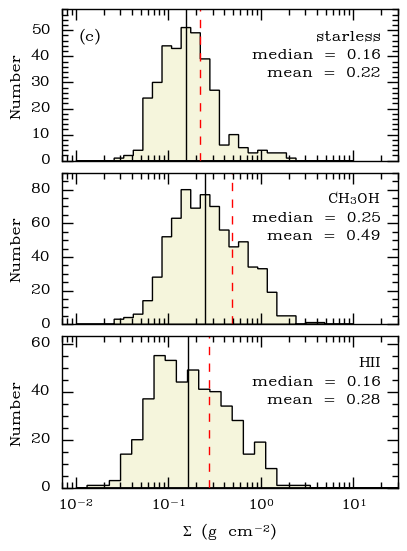

In [49]:
massDense_hmsc = hmscList['Mclump']/(np.pi*hmscList['r_pc']**2)*0.00020890822
massDense_hii = hiiList['Mclump']/(np.pi*hiiList['r_pc']**2)*0.00020890822
massDense_mmb = mmbList['Mclump']/(np.pi*mmbList['r_pc']**2)*0.00020890822
massDense_hmsc.name = 'massDense'
massDense_hii.name = 'massDense'
massDense_mmb.name = 'massDense'

%matplotlib inline
# histograms of distances
xmin = 0.007
xmax = 30
ymin = 0 
ymax = 58
fig7 = plt.figure(2, figsize = (4,5.5))
fig7.subplots_adjust(left = 0.07, right = 0.91, hspace = 0.08,
                     bottom = 0.09, top = 0.96)

m1  = np.median(massDense_hmsc[massDense_hmsc.mask == False])
m2  = np.mean(massDense_hmsc[massDense_hmsc.mask == False])
ax1 = fig7.add_subplot(311)
ax1.hist(massDense_hmsc, bins = np.logspace(-2,1,30), 
         histtype = 'stepfilled', color = 'beige')
ax1.set_xscale('log')
ax1.plot([m1,m1],[ymin,ymax], '-k')
ax1.plot([m2,m2],[ymin,ymax], '--r')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([ymin,ymax])
ax1.minorticks_on()
ax1.set_xticklabels([])
ax1.set_yticks([0,10,20,30,40,50])
ax1.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
         ymax-(ymax-ymin)*0.2, '(c)')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'starless', horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax1.set_ylabel('Number')

ymin = 0 
ymax = 90
m1  = np.median(massDense_mmb[massDense_mmb.mask == False])
m2  = np.mean(massDense_mmb[massDense_mmb.mask == False])
ax2 = fig7.add_subplot(312)
ax2.hist(massDense_mmb,  bins = np.logspace(-2,1,30),
         histtype = 'stepfilled', color = 'beige')
ax2.set_xscale('log')
ax2.plot([m1,m1],[ymin,ymax], '-k')
ax2.plot([m2,m2],[ymin,ymax], '--r')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([ymin,ymax])
ax2.minorticks_on()
ax2.set_xticklabels([])
ax2.set_yticks([0,20,40,60,80])
#ax2.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(b)')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'CH$_3$OH', horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')
ax2.set_ylabel('Number')

ymin = 0 
ymax = 63
m1  = np.median(massDense_hii)
m2  = np.mean(massDense_hii)
ax3 = fig7.add_subplot(313)
ax3.hist(massDense_hii, bins = np.logspace(-2,1.5,30), 
         histtype = 'stepfilled', color = 'beige')
ax3.set_xscale('log')
ax3.plot([m1,m1],[ymin,ymax], '-k')
ax3.plot([m2,m2],[ymin,ymax], '--r')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([ymin,ymax])
ax3.set_yticks([0,20,40,60])
ax3.minorticks_on()

#ax3.text(10**(np.log10(xmin)+(np.log10(xmax)-np.log10(xmin))*0.05), 
#         ymax-(ymax-ymin)*0.2, '(c)')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.2, 
         'HII', horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.32, 
         'median = '+'%.2f' %m1, horizontalalignment = 'right')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.05), ymax-(ymax-ymin)*0.44, 
         'mean = '+'%.2f' %m2, horizontalalignment = 'right')

ax3.set_xlabel(r"$\Sigma$ (g cm$^{-2}$)")
ax3.set_ylabel('Number')

fig7.savefig('../epsFigs/massDenseHist.eps' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')
fig7.savefig('../epsFigs/massDenseHist.pdf' ,dpi = 300, 
             bbox_inches='tight', papertype='a2')

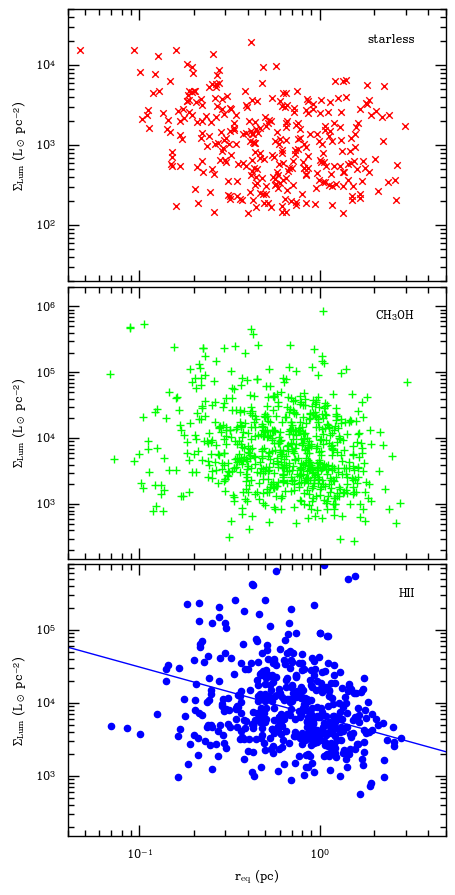

In [7]:
from lmfit.models import LinearModel, PowerLawModel
model = PowerLawModel()
%matplotlib inline
xmin = 0.04
xmax = 5
ymin = 20 
ymax = 5e4
LumDense = hmscList['Lclump']/(np.pi*hmscList['r_pc']**2)
fig8 = plt.figure(2, figsize = (4.5,9.5))
fig8.subplots_adjust(left = 0.07, right = 0.91, hspace=0.02,
                     bottom = 0.09, top = 0.96)

ax1 = fig8.add_subplot(311)
ax1.scatter(hmscList['r_pc'], LumDense,marker = 'x', s = 22, 
            color = 'red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim([ymin,ymax])
ax1.minorticks_on()
ax1.set_xticklabels([])
#ax1.set_yticks([0,10,20,30,40,50])

ax1.set_ylabel(r'$\Sigma_{Lum}$ ($L_\odot$ pc$^{-2}$)')
ax1.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.08), 
         10**(np.log10(ymax)-(np.log10(ymax)-np.log10(ymin))*0.12), 
         'starless', horizontalalignment = 'right')

ymin = 150 
ymax = 2e6
LumDense = mmbList['Lclump']/(np.pi*mmbList['r_pc']**2)

ax2 = fig8.add_subplot(312)
ax2.scatter(mmbList['r_pc'], LumDense, marker = '+', s = 40, 
            color = 'lime')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(xmin,xmax)
ax2.set_ylim([ymin,ymax])
ax2.minorticks_on()
ax2.set_xticklabels([])
#ax1.set_yticks([0,10,20,30,40,50])

ax2.set_ylabel(r'$\Sigma_{Lum}$ ($L_\odot$ pc$^{-2}$)')
ax2.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.08), 
         10**(np.log10(ymax)-(np.log10(ymax)-np.log10(ymin))*0.12), 
         'CH$_3$OH', horizontalalignment = 'right')

ymin = 150 
ymax = 8e5
LumDense = hiiList['Lclump']/(np.pi*hiiList['r_pc']**2)
pars = model.guess(LumDense, x=hiiList['r_pc'])
out = model.fit(LumDense, pars, x=hiiList['r_pc'])
slope, intercept, R, prob2, see = stats.linregress(np.log10(hiiList['r_pc']), 
                                                   np.log10(LumDense))
x = np.logspace(np.log10(xmin), np.log10(xmax))
y = np.log10(x)*slope+intercept
ax3 = fig8.add_subplot(313)
ax3.scatter(hiiList['r_pc'], LumDense,marker = '.', s = 80, 
            color = 'blue')
ax3.plot(x, 10**y)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(xmin,xmax)
ax3.set_ylim([ymin,ymax])
ax3.minorticks_on()
#ax1.set_yticks([0,10,20,30,40,50])
ax3.set_xlabel(r"r$_\mathrm{eq}$ (pc)")
ax3.set_ylabel(r'$\Sigma_{Lum}$ ($L_\odot$ pc$^{-2}$)')
ax3.text(10**(np.log10(xmax)-(np.log10(xmax)-np.log10(xmin))*0.08), 
         10**(np.log10(ymax)-(np.log10(ymax)-np.log10(ymin))*0.12), 
         'HII', horizontalalignment = 'right')

#fig8.savefig('../epsFigs/LumSurfaceDense.eps' ,dpi = 300, 
#             bbox_inches='tight', papertype='a2')
#fig8.savefig('../epsFigs/LumSurfaceDense.pdf' ,dpi = 300, 
#             bbox_inches='tight', papertype='a2')


